# Creating a Markov Chain
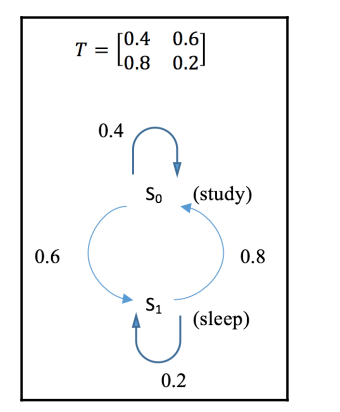
We are trying to create a Markov Chain for this

In [2]:
import torch
T = torch.tensor([[0.4,0.6],[0.8,0.2]]) # added transition probability


In [5]:
# Now Let  us see what happens after 2,5,10, 15 and 20 steps
# we have to take matrix power
T_2 = torch.matrix_power(T,2)
T_5 = torch.matrix_power(T,5)
T_10 = torch.matrix_power(T,10)
T_15 = torch.matrix_power(T,15)
T_20 = torch.matrix_power(T,20)

In [6]:
v = torch.tensor([[0.7,0.3]])


Below we are trying to see what happens to transition probability after certain number of steps

In [7]:
v_1 = torch.mm(v,T)
v_2 = torch.mm(v,T_2)
v_5 = torch.mm(v,T_5)
v_10 = torch.mm(v,T_10)
v_15 = torch.mm(v,T_15)`
v_20 = torch.mm(v,T_20)

In [9]:
print("Transition probability after 2 steps:\n{}".format(T_2))

Transition probability after 2 steps:
tensor([[0.6400, 0.3600],
        [0.4800, 0.5200]])


In [10]:
print("Transition probability after 5 steps:\n{}".format(T_5))

Transition probability after 5 steps:
tensor([[0.5670, 0.4330],
        [0.5773, 0.4227]])


In [11]:
print("Transition probability after 10 steps:\n{}".format(T_10))

Transition probability after 10 steps:
tensor([[0.5715, 0.4285],
        [0.5714, 0.4286]])


In [12]:
print("Transition probability after 15 steps:\n{}".format(T_15))

Transition probability after 15 steps:
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])


In [13]:
print("Transition probability after 20 steps:\n{}".format(T_20))

Transition probability after 20 steps:
tensor([[0.5714, 0.4286],
        [0.5714, 0.4286]])


Now let us look at the distribution of States

In [15]:
print("Distribution of states after 1 step:\n{}".format(v_1))
print("Distribution of states after 2 step:\n{}".format(v_2))
print("Distribution of states after 5 step:\n{}".format(v_5))
print("Distribution of states after 10 step:\n{}".format(v_10))
print("Distribution of states after 15 step:\n{}".format(v_15))
print("Distribution of states after 20 step:\n{}".format(v_20))

Distribution of states after 1 step:
tensor([[0.5200, 0.4800]])
Distribution of states after 2 step:
tensor([[0.5920, 0.4080]])
Distribution of states after 5 step:
tensor([[0.5701, 0.4299]])
Distribution of states after 10 step:
tensor([[0.5714, 0.4286]])
Distribution of states after 15 step:
tensor([[0.5714, 0.4286]])
Distribution of states after 20 step:
tensor([[0.5714, 0.4286]])


As we can see in the above cell, distribution of states has also converged

# Creating an MDP - Markov Decision Process

Besides a set of possible states, S = {s0, s1, ... , sm}, an MDP is defined by a set of actions, A =
{a0, a1, ... , an}; a transition model, T(s, a, s'); a reward function, R(s); and a discount factor,
$\gamma$. Let us now create an MDP using PyTorch 

In [19]:
T = torch.tensor(([[[0.8, 0.1, 0.1],  
                     [0.1, 0.6, 0.3]],
                    [[0.7, 0.2, 0.1],
                     [0.1, 0.8, 0.1]],
                    [[0.6, 0.2, 0.2],
                     [0.1, 0.4, 0.5]]]
                  ))

In [22]:
R = torch.tensor([1,0,-1]) # Reward
gamma = 0.5 # Discount Factor

In [23]:
action = 0

Probablistic interpretation of value:
The distribution function essentially - as you increase the time steps - $V_t = V_{t+1}$. So you could use matrix inversion
Since, 
$$
V_{t+1} = R + \gamma \times T \times V
$$
$$
V = R + \gamma \times T \times V
$$
$$
\therefore V = (I-\gamma T)^{-1} * R
$$
There are however problems associated with this, since inverting an $n*n$ matrix would be hard. 

In [25]:
# Frozen Lake  Environment
import gymnasium as gym
env = gym.make('FrozenLake-v1')

In [26]:
n_state = env.observation_space.n
n_action = env.action_space.n
print(n_state,n_action)

16 4


There are 16 states in the Frozen Lake Environment

In [27]:
env.reset()

(0, {'prob': 1})

In [30]:
env.render()

In [33]:
new_state,reward,terminated,truncated,info = env.step(3)

In [36]:
env.render()

In [39]:
reward


0.0

In [38]:
terminated

False

In [42]:
def run_episode(env,policy):
    state, info = env.reset()
    total_reward = 0
    terminated = False
    truncated= False
    while (not terminated) and (not truncated):
        action = policy[state].item()
        new_state,reward,terminated,truncated,info = env.step(action)
        total_reward += reward
        if (terminated) or (truncated):
            break
    return total_reward

In [43]:
n_episode =1000
total_rewards = []
for episode in range(n_episode):
    random_policy = torch.randint(high=n_action,size=(n_state,))
    total_reward = run_episode(env,random_policy)
    total_rewards.append(total_reward)

In [46]:
sum(total_rewards)/len(total_rewards)

0.018

Conclusion - choosing random actions very bad.

In [71]:
best_policy =None
while True:
    random_policy = torch.randint(high=n_action, size=(n_state,))
    total_reward = run_episode(env, random_policy)
    if total_reward == 1:
        best_policy = random_policy
        break

In [72]:
best_policy

tensor([2, 3, 1, 3, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1, 1, 0])

In [73]:
total_rewards =[] 
for episode in range(n_episode):
    total_reward = run_episode(env,best_policy)
    total_rewards.append(total_reward)

In [74]:
sum(total_rewards)/len(total_rewards)

0.036

In [75]:
total_rewards

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [76]:
print(env.env.P[6])

{0: [(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 10, 0.0, False)], 1: [(0.3333333333333333, 5, 0.0, True), (0.3333333333333333, 10, 0.0, False), (0.3333333333333333, 7, 0.0, True)], 2: [(0.3333333333333333, 10, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 2, 0.0, False)], 3: [(0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 5, 0.0, True)]}


# Value Iteration and Policy Iteration 
Not going into much of it since what I mostly need is Deep RL